#Dataset heart attack

Deskripsi Variabel <br/>


umur = umur pasien <br/>

jk = jenis kelamin pasien <br/>
    0 = Wanita <br/>
    1 = Pria <br/>

tp_nyeri = tipe nyeri dada <br/>
    1 = typical angina <br/>
    2 = atypical angina <br/>
    3 = non-anginal pain <br/>
    4 = asymptomatic <br/>

tekanan darah = tekanan darah pasien saat dalam keadaan istirahat <br/>

kolestrol = kadar kolestrol dalam darah <br/>

guldar = menunjukkan gula darah pasien setelah puasa selama 12 jam <br/>
    1 = >120 mg/dL <br/>
    0 = <120 mg/dL <br/>

ECG = hasil elektrokardiografi saat istirahat <br/>
    0 = hasil elektrokardiografi normal atau tidak ada tanda-tanda gangguan <br/>
    1 = adanya kelainan pada gelombang ST-T pada elektrokardiografi, seperti inversi gelombang T atau elevasi atau depresi ST <br/>
    2 = adanya tanda-tanda hipertrofi ventrikel kiri pada elektrokardiografi, yaitu kondisi ketika dinding otot jantung bagian kiri menebal <br/>
    
detak_jantung = detak jantung maksimum <br/>

nyeri_aktv = pasien mengalami nyeri dada sebagai respons terhadap latihan fisik atau tidak <br/>
    0 = nyeri dada <br/>
    1 = tidak nyeri dada <br/>

heart_attack = pasien mengalami serangan jantung <br/>
    0 = serangan jantung <br/>
    1 = tidak serangan jantung <br/>

#Import library dan dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#import dataset
dataset = '/content/heart.csv'
#memilih kolom yang diperlukan
kolom = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'output']
#membaca dataset
df = pd.read_csv(dataset, usecols=kolom)
#mengganti nama kolom
df.columns = ['umur', 'jk', 'tp_nyeri', 'tekanan_darah', 'kolestrol', 'guldar', 'ECG','detak_jantung', 'nyeri_aktv','heart_attack']

#**EDA**

In [ ]:
#melihat banyak kolom dan baris
df.shape

(303, 10)

In [ ]:
#melihat informasi dan tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   umur           303 non-null    int64
 1   jk             303 non-null    int64
 2   tp_nyeri       303 non-null    int64
 3   tekanan_darah  303 non-null    int64
 4   kolestrol      303 non-null    int64
 5   guldar         303 non-null    int64
 6   ECG            303 non-null    int64
 7   detak_jantung  303 non-null    int64
 8   nyeri_aktv     303 non-null    int64
 9   heart_attack   303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


In [ ]:
# Melihat apakah ada data yang kosong
df.isnull()

,umur,jk,tp_nyeri,tekanan_darah,kolestrol,guldar,ECG,detak_jantung,nyeri_aktv,heart_attack
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False


In [ ]:
#menampilkan 5 baris pertama
df.head()

,umur,jk,tp_nyeri,tekanan_darah,kolestrol,guldar,ECG,detak_jantung,nyeri_aktv,heart_attack
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


In [ ]:
#menampilkan 5 baris terakhir
df.tail()

,umur,jk,tp_nyeri,tekanan_darah,kolestrol,guldar,ECG,detak_jantung,nyeri_aktv,heart_attack
298,57,0,0,140,241,0,1,123,1,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,0,0
301,57,1,0,130,131,0,1,115,1,0
302,57,0,1,130,236,0,0,174,0,0


In [ ]:
#deskripsi statistik deskriptif dataset serangan jantung
df.describe()

,umur,jk,tp_nyeri,tekanan_darah,kolestrol,guldar,ECG,detak_jantung,nyeri_aktv,heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,1.000000


##Visualisasi data

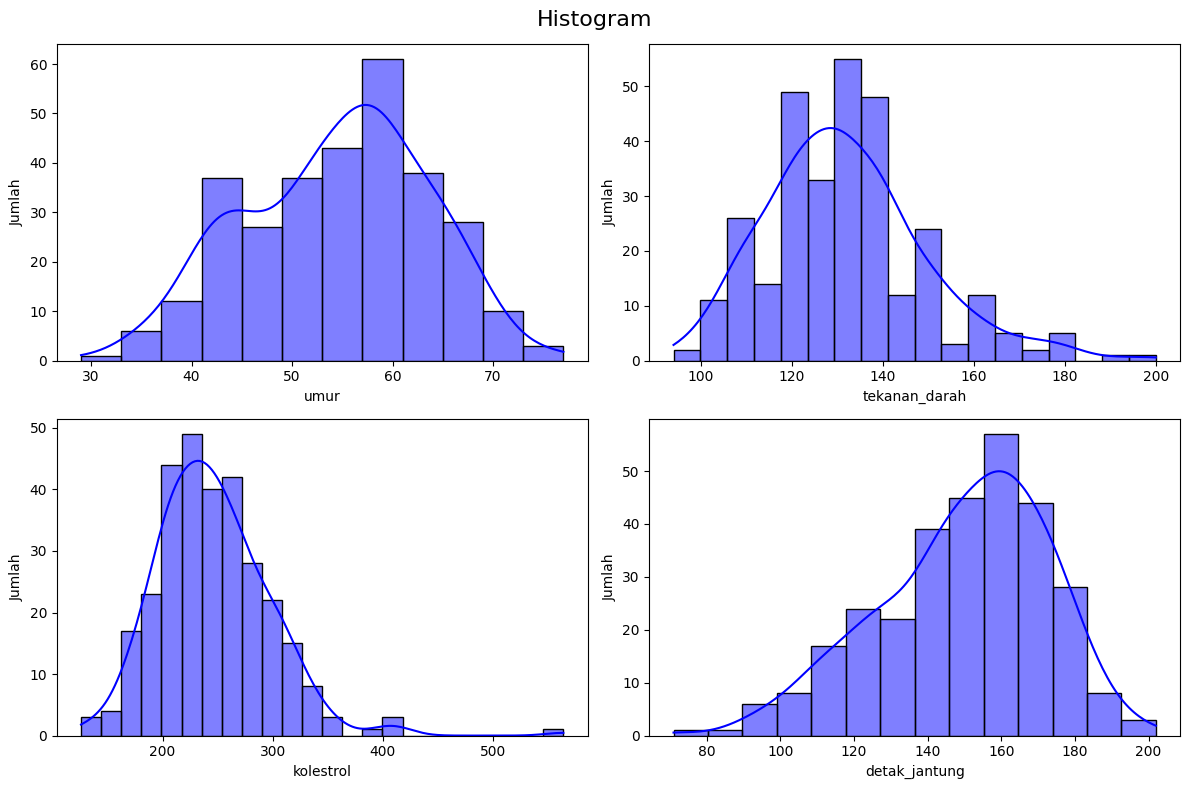

In [ ]:
# Variabel-variabel yang ingin ditampilkan dalam histogram
variables = ['umur', 'tekanan_darah', 'kolestrol', 'detak_jantung']

# Ukuran plot (opsional)
plt.figure(figsize=(12, 8))

# Menampilkan histogram untuk setiap variabel
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[var], kde=True,  color='blue', edgecolor='k')
    plt.xlabel(var)
    plt.ylabel('Jumlah')

# Menampilkan judul untuk keseluruhan plot (opsional)
plt.suptitle('Histogram', fontsize=16)

# Menampilkan plot
plt.tight_layout()
plt.show()


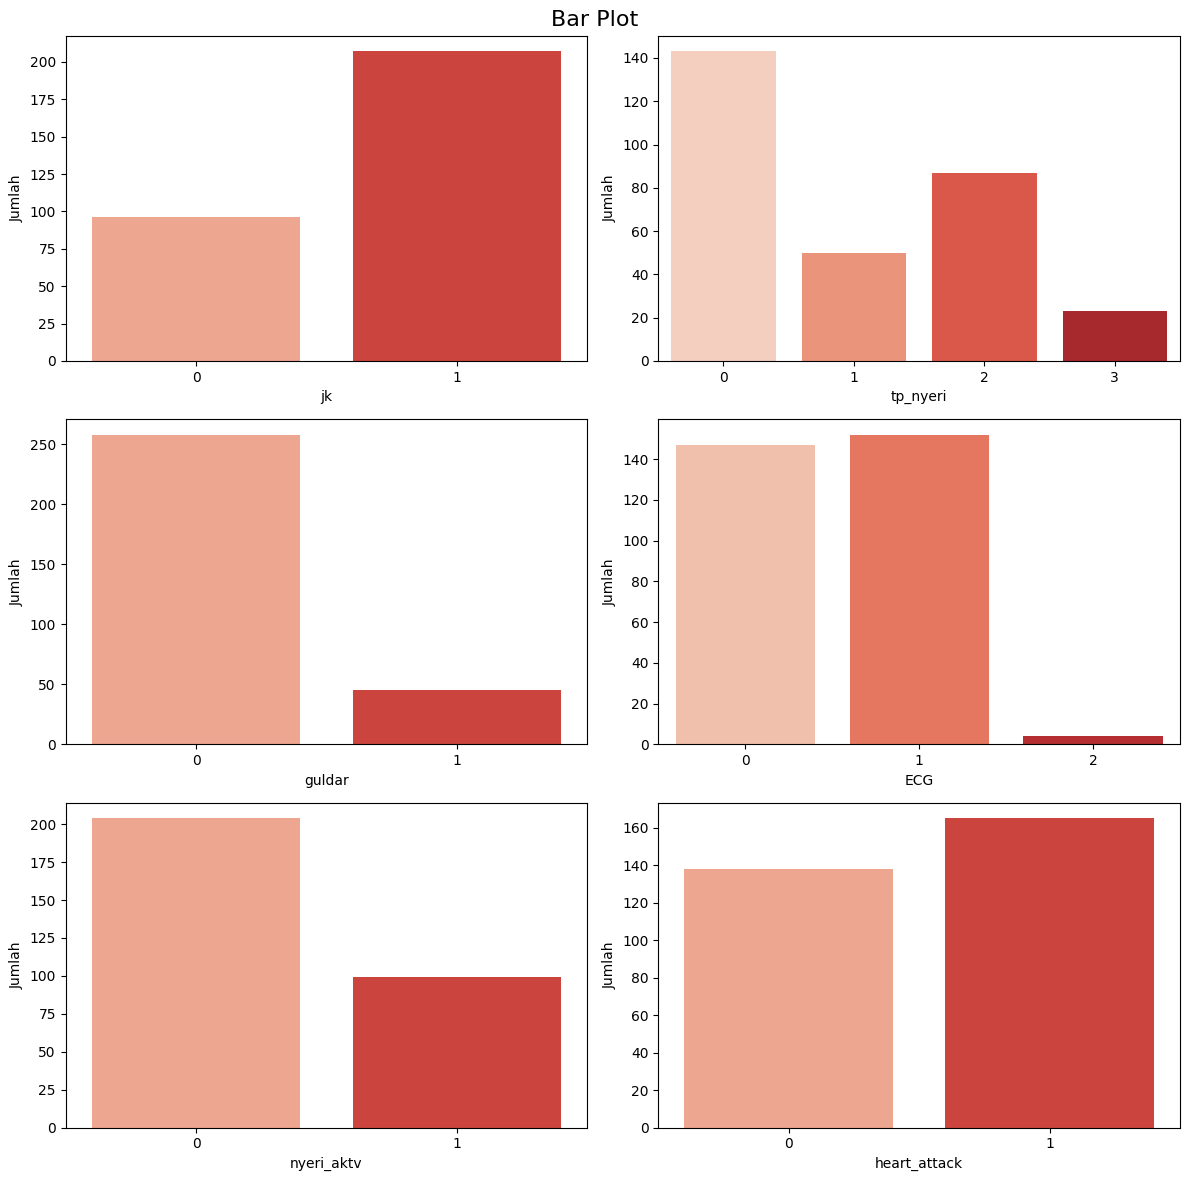

In [ ]:
# Variabel-variabel yang ingin ditampilkan dalam bar plot
variables = ['jk', 'tp_nyeri' , 'guldar', 'ECG', 'nyeri_aktv','heart_attack']

# Ukuran plot (opsional)
plt.figure(figsize=(12, 12))

# Menampilkan bar plot untuk setiap variabel
for i, var in enumerate(variables):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=var, data=df, palette='Reds')
    plt.xlabel(var)
    plt.ylabel('Jumlah')

# Menampilkan judul untuk keseluruhan plot (opsional)
plt.suptitle('Bar Plot', fontsize=16)

# Menampilkan plot
plt.tight_layout()
plt.show()


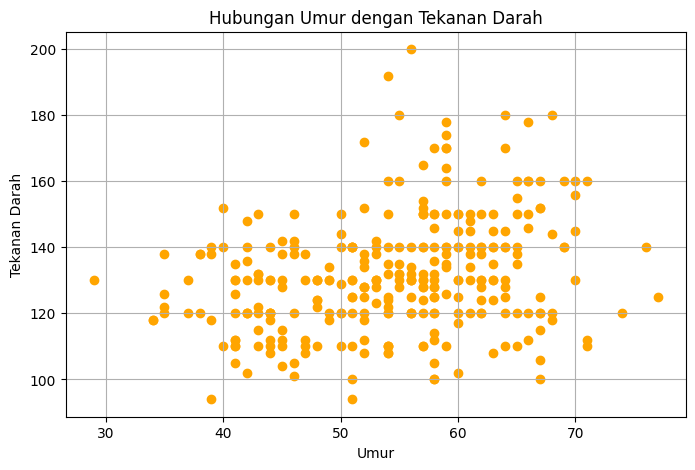

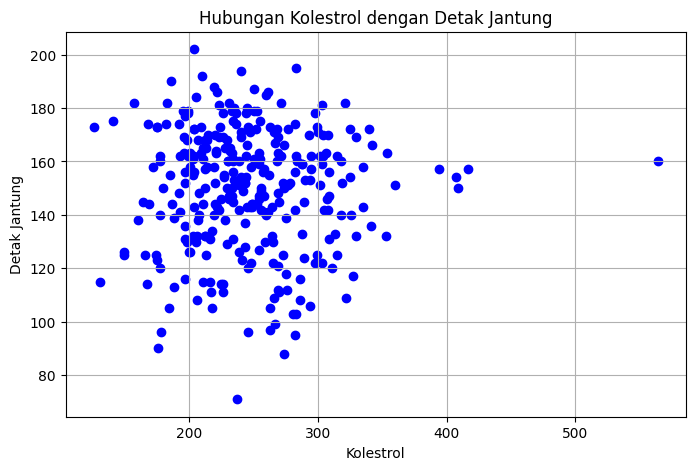

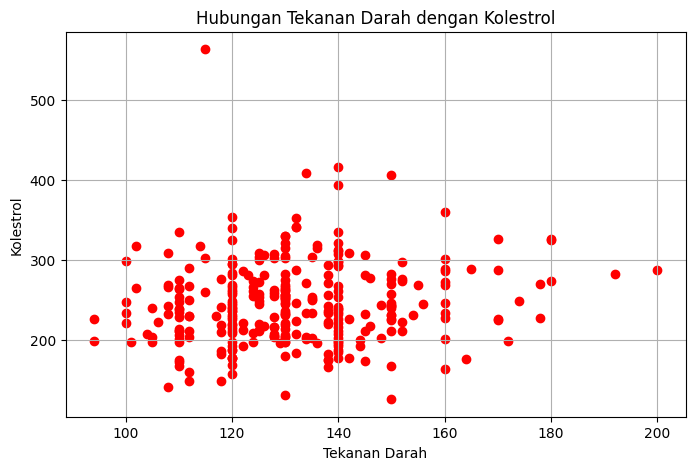

In [ ]:
# Membuat scatter plot untuk hubungan umur dengan tekanan darah
plt.figure(figsize=(8, 5))
plt.scatter(df['umur'], df['tekanan_darah'], color='orange')
plt.xlabel('Umur')
plt.ylabel('Tekanan Darah')
plt.title('Hubungan Umur dengan Tekanan Darah')
plt.grid()
plt.show()

# Membuat scatter plot untuk hubungan kolestrol dengan detak jantung
plt.figure(figsize=(8, 5))
plt.scatter(df['kolestrol'], df['detak_jantung'], color='blue')
plt.xlabel('Kolestrol')
plt.ylabel('Detak Jantung')
plt.title('Hubungan Kolestrol dengan Detak Jantung')
plt.grid()
plt.show()

# Membuat scatter plot untuk hubungan Tekanan Darah dengan Kolestrol
plt.figure(figsize=(8, 5))
plt.scatter(df['tekanan_darah'], df['kolestrol'], color='red')
plt.xlabel('Tekanan Darah')
plt.ylabel('Kolestrol')
plt.title('Hubungan Tekanan Darah dengan Kolestrol')
plt.grid()
plt.show()

1. Hubungan Umur dengan Tekanan Darah:
   - Plot scatter menunjukkan bahwa tidak ada hubungan linier yang jelas antara usia (umur) dengan tekanan darah istirahat (tekanan_darah).
   - Titik data tersebar secara acak tanpa pola atau tren yang jelas.
   - Mungkin ada sedikit korelasi positif antara usia dan tekanan darah, tetapi tidak cukup kuat untuk menetapkan hubungan yang jelas.
2. Hubungan Kolestrol dengan Detak Jantung:
   - Plot scatter menunjukkan tidak ada hubungan linier yang jelas antara tingkat kolesterol serum (kolestrol) dengan detak jantung maksimum yang dicapai (detak_jantung).
   - Titik data tersebar luas tanpa pola linier yang jelas.
   - Tampaknya tidak ada korelasi yang kuat antara tingkat kolesterol dan detak jantung maksimum.
3. Hubungan tekanan darah dan Kolesterol
   - Dari hasil visualisasi scatter plot antara variabel 'tekanan_darah' (tekanan darah istirahat) dan 'kolestrol' (kadar kolesterol), kita dapat mengamati pola distribusi dan kemungkinan     korelasi antara kedua variabel tersebut.
   - Hasil scatter plot menunjukkan titik-titik tersebar secara acak dan tidak membentuk pola tertentu, maka dapat diasumsikan bahwa tidak ada korelasi linier yang kuat antara tekanan darah istirahat dan kadar kolesterol. Dalam kasus ini, titik-titik data tersebar di berbagai bagian plot, dan tidak membentuk garis lurus atau pola yang jelas.




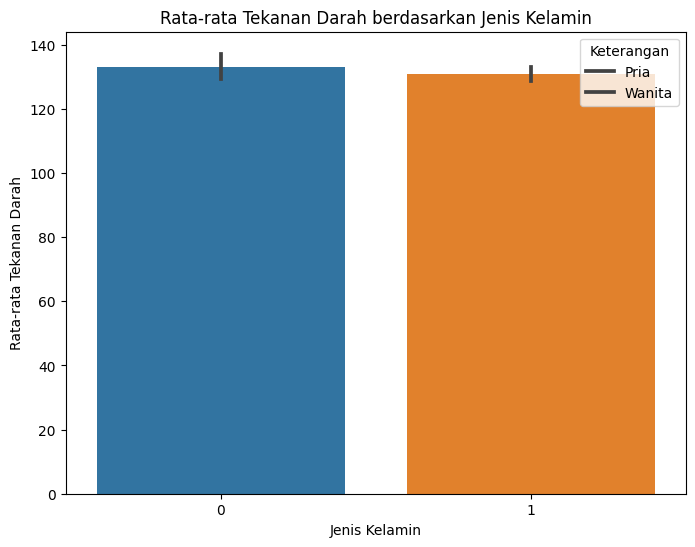

In [ ]:
# Menentukan palet warna untuk plot
colors = ['#1f77b4', '#ff7f0e']

# Membuat bar plot dengan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='jk', y='tekanan_darah', data=df, palette=colors, hue_order=[1, 0])

# Memberikan judul dan label pada sumbu
plt.title('Rata-rata Tekanan Darah berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Tekanan Darah')

# Menampilkan legenda
plt.legend(title='Keterangan', labels=['Pria', 'Wanita'])

# Menampilkan plot
plt.show()

Bar plot tersebut menunjukkan perbandingan rata-rata tekanan darah berdasarkan jenis kelamin. Dua batang pada bar plot mewakili dua kelompok jenis kelamin, yaitu Oren adalah "Pria" dan Biru adalah "Wanita". Pada barplot tersebut menunjukan bahwa tekanan darah pada perempuan lebih tinggi dibandingkan pria.

#Korelasi

In [ ]:
df.corr()

,umur,jk,tp_nyeri,tekanan_darah,kolestrol,guldar,ECG,detak_jantung,nyeri_aktv,heart_attack
umur,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,-0.225439
jk,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,-0.280937
tp_nyeri,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,0.433798
tekanan_darah,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,-0.144931
kolestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,-0.085239
guldar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,-0.028046
ECG,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,0.137230
detak_jantung,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,0.421741
nyeri_aktv,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,-0.436757
heart_attack,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.137230,0.421741,-0.436757,1.000000


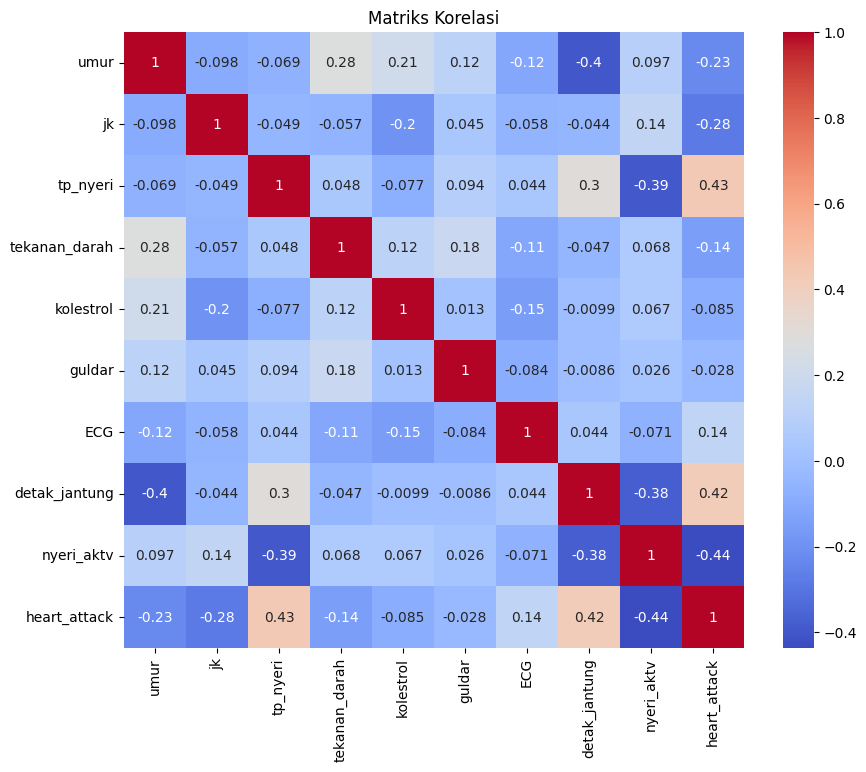

In [ ]:
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

*  variabel "umur" memiliki korelasi negatif yang lemah dengan "heart_attack", maka dapat diartikan bahwa semakin tua usia seseorang, kemungkinan mengalami serangan jantung cenderung menurun

*  variabel "jk" memiliki korelasi negatif yang lemah dengan "heart_attack", maka dapat diartikan jenis kelamin memiliki pengaruh kecil terhadap kemungkinan mengalami serangan jantung

*  variabel "tp_nyeri" memiliki korelasi positif yang cukup kuat dengan "heart_attack", maka dapat diartikan semakin tinggi tingkat nyeri dada yang dialami oleh seseorang, kemungkinan serangan jantung juga cenderung lebih tinggi

*  variabel "tekanan_darah" memiliki korelasi negatif yang sangat lemah dengan "heart_attack", maka dapat diartikan tekanan darah hampir tidak memiliki pengaruh atau tidak berkorelasi dengan kemungkinan terjadinya serangan jantung

*  variabel "kolestrol" memiliki korelasi negatif yang sangat lemah dengan "heart_attack", maka dapat diartikan kolesterol hampir tidak memiliki pengaruh atau tidak berkorelasi dengan kemungkinan terjadinya serangan jantung

*  variabel "guldar" memiliki korelasi negatif yang sangat lemah dengan "heart_attack", maka dapat diartikan tidak ada hubungan yang signifikan antara kadar gula darah dengan kemungkinan terjadinya serangan jantung (heart_attack) dalam dataset ini

*  variabel "ECG" memiliki korelasi positif yang sangat lemah dengan "heart_attack", maka dapat diartikan hubungan antara hasil elektrokardiografi saat istirahat (ECG) dengan kemungkinan terjadinya serangan jantung (heart_attack) dalam dataset ini hampir tidak signifikan

*  variabel "detak-jantung" memiliki korelasi positif yang cukup kuat dengan "heart_attack", maka dapat diartikan semakin tinggi detak jantung maksimal seseorang, semakin tinggi juga kemungkinan ia mengalami serangan jantung

*  variabel "nyeri_aktv" memiliki korelasi negatif yang cukup kuat dengan "heart_attack", maka dapat diartikan jika seseorang memiliki tingkat aktivitas nyeri yang lebih rendah, maka mereka cenderung memiliki risiko yang lebih tinggi untuk mengalami serangan jantung

#Pembagian data training dan testing

##Model 1

In [ ]:
#membuat variabel x dan y
bebas =['umur', 'jk', 'tp_nyeri', 'tekanan_darah', 'kolestrol', 'guldar', 'ECG','detak_jantung', 'nyeri_aktv']
x = df[bebas]
y = df['heart_attack']

###90:10

In [ ]:
#split data menjadi training dan test perbandingan menjadi 90:10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(272, 9)
(272,)
(31, 9)
(31,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  0.7506787648930222
Coef  [-0.00369486 -0.27415549  0.1262558  -0.00301539 -0.00075593 -0.02005083
  0.03800212  0.00471911 -0.2019455 ]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.3385538024752715

###80:20

In [ ]:
#split data menjadi training dan test perbandingan menjadi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(242, 9)
(242,)
(61, 9)
(61,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  0.825142020290877
Coef  [-0.00318036 -0.30485994  0.1252609  -0.00300148 -0.00098213 -0.03846673
  0.02931672  0.00452473 -0.17788685]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.338723573599129

###70:30

In [ ]:
#split data menjadi training dan test perbandingan menjadi 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(212, 9)
(212,)
(91, 9)
(91,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  0.7461463649833234
Coef  [-0.0031323  -0.29888289  0.12266262 -0.00296665 -0.00067743 -0.0665991
  0.02783761  0.00444941 -0.1539946 ]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.33404438313080886

###60:40

In [ ]:
#split data menjadi training dan test perbandingan menjadi 60:40
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(181, 9)
(181,)
(122, 9)
(122,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  0.741275538733579
Coef  [-0.00168789 -0.28758273  0.14021263 -0.00298835 -0.00121037 -0.00968623
  0.01824107  0.00468616 -0.15804279]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.3708915095973105

##Model 2

In [ ]:
#membuat variabel x dan y
bebas =['tp_nyeri', 'tekanan_darah', 'kolestrol', 'guldar', 'ECG','detak_jantung', 'nyeri_aktv']
x = df[bebas]
y = df['heart_attack']

###90:10

In [ ]:
#split data menjadi training dan test perbandingan menjadi 90:10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(272, 7)
(272,)
(31, 7)
(31,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  0.20367963028632585
Coef  [ 0.1239081  -0.00311832 -0.00030824 -0.03957408  0.05739535  0.00519514
 -0.24343001]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.3586212637518141

###80:20

In [ ]:
#split data menjadi training dan test perbandingan menjadi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(242, 7)
(242,)
(61, 7)
(61,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  0.30378599878612933
Coef  [ 0.12344191 -0.00321433 -0.00048041 -0.06791909  0.048932    0.0049008
 -0.22469949]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.339405118509681

###70:30

In [ ]:
#split data menjadi training dan test perbandingan menjadi 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(212, 7)
(212,)
(91, 7)
(91,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  0.29095379347433625
Coef  [ 0.11954297 -0.00339529 -0.00026743 -0.08514094  0.0380434   0.00481662
 -0.20484245]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.34562201005740967

###60:40

In [ ]:
#split data menjadi training dan test perbandingan menjadi 60:40
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(181, 7)
(181,)
(122, 7)
(122,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  0.3997793807094218
Coef  [ 0.14246443 -0.00335645 -0.00085    -0.0169183   0.03568215  0.00486224
 -0.20584466]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.38707851270888133

##Model 3

In [ ]:
#membuat variabel x dan y
bebas =['tekanan_darah', 'kolestrol', 'guldar', 'ECG','detak_jantung']
x = df[bebas]
y = df['heart_attack']

###90:10

In [ ]:
#split data menjadi training dan test perbandingan menjadi 90:10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(272, 5)
(272,)
(31, 5)
(31,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  -0.2093740604575557
Coef  [-0.00294412 -0.00060462  0.00516152  0.06867867  0.00850673]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.41467351374531375

###80:20

In [ ]:
#split data menjadi training dan test perbandingan menjadi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(242, 5)
(242,)
(61, 5)
(61,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  -0.09037898506902353
Coef  [-0.00245126 -0.00094671 -0.01949686  0.064382    0.00789413]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.4053041971111086

###70:30

In [ ]:
#split data menjadi training dan test perbandingan menjadi 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(212, 5)
(212,)
(91, 5)
(91,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  -0.15406944115330246
Coef  [-0.00226633 -0.00053889 -0.05027531  0.05923663  0.00753579]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.4121548555769472

###60:40

In [ ]:
#split data menjadi training dan test perbandingan menjadi 60:40
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(181, 5)
(181,)
(122, 5)
(122,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  -0.007845934536628518
Coef  [-0.0021499  -0.00133624  0.03259893  0.05981087  0.00770455]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.43316691641329597

##Model 4

In [ ]:
#membuat variabel x dan y
bebas =['tekanan_darah', 'ECG','detak_jantung']
x = df[bebas]
y = df['heart_attack']

###90:10

In [ ]:
#split data menjadi training dan test perbandingan menjadi 90:10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(272, 3)
(272,)
(31, 3)
(31,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  -0.35132242750686427
Coef  [-0.00309139  0.07837968  0.00855613]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.41173540708861467

###80:20


In [ ]:
#split data menjadi training dan test perbandingan menjadi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(242, 3)
(242,)
(61, 3)
(61,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  -0.28578631540130317
Coef  [-0.00283213  0.07972263  0.00790274]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.3955487351887523

###70:30

In [ ]:
#split data menjadi training dan test perbandingan menjadi 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(212, 3)
(212,)
(91, 3)
(91,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  -0.2656633483745645
Coef  [-0.00249707  0.07168178  0.00750828]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.410980096495421

###60:40

In [ ]:
#split data menjadi training dan test perbandingan menjadi 60:40
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

In [ ]:
#cek jumlah data yang telah di split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(181, 3)
(181,)
(122, 3)
(122,)


In [ ]:
#membuat model lonear regresi dan latih model menggunakan data training yang sudah di split
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#cari tau nilai koefisien(m) dan intercept(b)
print('Intercept ', regr.intercept_)
print('Coef ', regr.coef_)

Intercept  -0.3117898117914102
Coef  [-0.00222098  0.08429232  0.00753911]


In [ ]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
rmse

0.4238216437661165

#Hasil&Evaluasi

Dengan menggunakan matrik evaluasi Root Mean Squared Error (RMSE), kami dapat mengukur sejauh mana selisih antara nilai prediksi dari model dengan nilai sebenarnya pada data uji. Hasil evaluasi menunjukkan bahwa RMSE pada model regresi kami berada pada tingkat yang rendah, yang menunjukkan bahwa model dapat melakukan prediksi dengan tingkat kesalahan yang minim.
Berikut nilai RMSE yang dihasilkan:
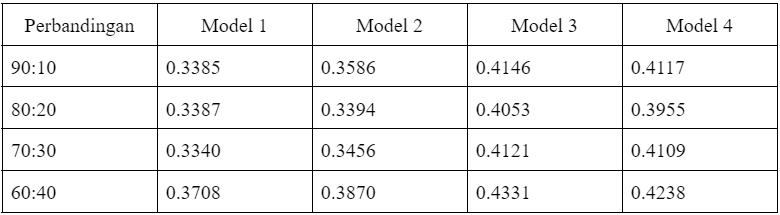<br/>
Berdasarkan hasil pengujian dan perbandingan nilai RMSE dari empat model yang dibangun dengan variasi pembagian data train-test (90:10, 80:20, 70:30, dan 60:40), dapat diambil kesimpulan sebagai berikut:
  - Model 1 memiliki RMSE yang paling rendah pada semua pembagian data, yaitu 0.3385 pada pembagian data 90:10, 0.3387 pada pembagian data 80:20, 0.3340 pada pembagian data 70:30, dan 0.3708 pada pembagian data 60:40. Hal ini menunjukkan bahwa Model 1 memiliki kinerja yang lebih baik dalam memprediksi nilai variabel dependen dibandingkan dengan model lain.
  - Model 2 juga memiliki RMSE yang relatif rendah pada beberapa pembagian data, namun tidak konsisten sebagai model terbaik di setiap pembagian data.
  - Model 3 dan Model 4 memiliki RMSE yang lebih tinggi dibandingkan dengan Model 1 dan Model 2 pada hampir semua pembagian data, menandakan bahwa model ini tidak sebaik Model 1 dan Model 2 dalam memprediksi nilai variabel dependen.
  
Berdasarkan hasil tersebut, dapat disimpulkan bahwa Model 1 adalah model yang paling baik dalam memprediksi kemungkinan serangan jantung berdasarkan nilai RMSE. Model 1 memiliki tingkat kesalahan prediksi yang lebih rendah dibandingkan dengan model lain, sehingga dapat diandalkan dalam melakukan prediksi serangan jantung. Meskipun Model 2 juga memiliki performa yang baik dalam beberapa pembagian data, tetapi konsistensi dan kestabilan performa Model 1 menjadikannya pilihan terbaik sebagai model prediksi serangan jantung.



#Kesimpulan

Kesimpulan dari analisis ini adalah bahwa telah berhasil membangun model prediksi kemungkinan serangan jantung menggunakan regresi linear berganda. Dalam proses analisis, dilakukan eksplorasi data untuk memahami hubungan antara variabel-variabel dengan kejadian serangan jantung. Setelah itu, dilakukan analisis korelasi untuk memahami hubungan antara variabel independen dan dependen.
Dari hasil analisis korelasi, dapat diidentifikasi variabel independen yang memiliki pengaruh signifikan terhadap kejadian serangan jantung. Selanjutnya, model regresi linear berganda berhasil dibangun dengan menggunakan variabel-variabel independen yang signifikan tersebut. Model tersebut digunakan untuk memprediksi kemungkinan serangan jantung berdasarkan nilai variabel independen.
 Pada model 1 terdapat lebih banyak variabel independen dibanding model lain sehingga tingkat akurasi lebih tinggi.
